In [339]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from scipy.optimize import curve_fit

In [340]:
# Read the image file
filename = 'data/TD/2021_01_22_Praktikum_Jakob_Richard_0001_ModePolarization_Total_Intensity.png'
im_arr = cv2.imread(filename)

# Define total height of the image [mm]
total_heigth = 3.556352

# Define the sample frequency [Hz]
f_sample = 48e3

# Define the speaker frequency [Hz]
f_speaker = 20

# Generate depth array [mm]
z_arr = np.linspace(0, -total_heigth, im_arr.shape[0])

# Define the total duration of the image [s]
total_duration = im_arr.shape[1] / f_sample

# Generate time array [a.u.]
t_arr = np.linspace(0, total_duration, im_arr.shape[1])

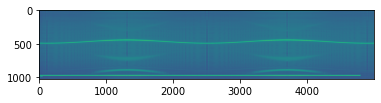

In [341]:
# Normalize the image
im_arr = np.mean(im_arr, axis=-1)
im_arr /= im_arr.max()
plt.imshow(im_arr)

In [342]:
# Create a thresholded image
treshold = 0.85
theshold_inds = np.argwhere(im_arr >= treshold)

# Create a mask to only select the area around the signal
limit_inds = [350, 550]
signal_mask = np.logical_and(
    limit_inds[0] <= theshold_inds[:, 0],
    limit_inds[1] > theshold_inds[:, 0]
)
signal_inds = theshold_inds[signal_mask]

# Convert the indices into time and depth arrays
z_data = z_arr[signal_inds[:,0]]
t_data = t_arr[signal_inds[:,1]]

In [343]:
# Fit a sine curve to the data
f_sine = lambda t, A, B, t_off: A * np.sin(2 * np.pi * f_speaker * (t - t_off)) + B
params_0 = [
    (z_data.max() - z_data.min()) / 2,
    z_data.mean(),
    0
]

try:
    params, _ = curve_fit(f_sine, t_data, z_data, p0=params_0)
    print(params)
except RuntimeError as e:
    print(e)

f_sine_fit = lambda t: f_sine(t, *params)

[ 0.08443878 -1.62938689  0.01478897]


In [345]:
# Calculate the max. velocity of the membrane
v_max = 2 * np.pi * params[0] * f_speaker
print('V_max: [mm/s]', v_max)

V_max: 10.610890340425343


In [ ]:
# Create and format a plot
fig, ax = plt.subplots(figsize=[10,8])
ax.grid()
ax.set_xlabel('Zeit [s]')
ax.set_ylabel('Tiefe [mm]')

# Plot the data
ax.plot(t_data, z_data, '.', c='gray', ms=0.8, label='Extrahierte Messwerte')

# Plot the fit
ax.plot(t_arr, f_sine_fit(t_arr), 'k-', label='Angepasste Sinusfunktion')

ax.legend()
fig.savefig(f'figs/aufgabe1-amplitude.png', dpi=300, bbox_inches='tight')